<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Model Evaluation and Refinement.***

Estimated time needed: **30** minutes

## ***Objectives.***

After completing this lab you will be able to:

*   Evaluate and refine prediction models


$ \ $

----

<h2>Table of Contents</h2>
<ul>
    <li><a href="https://#ref1">Model Evaluation </a></li>
    <li><a href="https://#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="https://#ref3">Ridge Regression </a></li>
    <li><a href="https://#ref4">Grid Search</a></li>
</ul>


In [ ]:
import pandas as pd
import numpy as np

#(1) Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

#(2) We read the csv data
df = pd.read_csv(path)

#(3) We save the data df locally
df.to_csv("module_5_auto.csv")

#(4) We show on the screen the results
df.head()


,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


$ \ $

---

## ***Note (type of the data df).***

It is possible that the data df has some different data type on its columns, that is why we first set every element of df as numeric:


In [ ]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


$ \ $

----

# ***Libraries for plotting.***

For our studies we need to charge the following library.


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

$ \ $

---

# ***Functions for Plotting.***

Now we create some functions that they will be useful for our work.


In [ ]:
# We create a function that shows the plot of some distribution.

def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):

    #(1) configuramos el tamaño de la imagen.
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    #(2) we import the function distplot of seaborn.
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    #(3) We set the title and the labels of the axis x and y.
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    #(4) We show on the screen the plot and close 
    plt.show()
    plt.close()


In [ ]:
# training data 
# testing data 
# lr:  linear regression object 
# poly_transform:  polynomial transformation object 

def pol_plot(x_train, x_test, y_train, y_test, lr,poly_transform):

    #(1) configuramos el tamaño de la imagen.
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #(2)
    x_max=max([x_train.values.max(), x_test.values.max()])

    #(3)
    x_min=min([x_train.values.min(), x_test.values.min()])

    #(4)
    x=np.arange(x_min, x_max, 0.1)

    #(5)
    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')

    #(6)
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')

    #(7) 
    plt.legend()


$ \ $

-----

# ***Part 1: Training and Testing.***

An important step in testing your model is to split your data into:

* Training data.

* Testing data.


$ \ $

## ***Example (training and testing data).***


$(1)$ We will place the target data `"price"` in a separate dataframe $y_{data}$.


In [ ]:
y_data = df['price']
(y_data).head(15)

$ \ $


$(2)$ Drop price data in dataframe $x_{data}$.


In [ ]:
df.head()

In [ ]:
help(df.drop)

In [ ]:
#(1) borramos la columna "price" del dataframe df y llamamos este nuevo dataframe x_data
x_data = df.drop('price', axis=1) 

#(2) mostramos en pantalla nuestro resultado
x_data

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,10.217391,0,1
197,197,197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,12.368421,0,1
198,198,198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,13.055556,0,1
199,199,199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,9.038462,1,0


$ \ $


$(3)$ Now, we randomly split our data into `training and testing` data using the function ***train_test_split***.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#(1) Esto no lo entiendo ya que no lo han explicado
x_data = df.drop('price', axis=1) 
y_data = df['price']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1 , random_state=1)

#(2) Imprimimos en pantalla algunos datos obtenidos que no entendemos.
print(x_test)
print("  ")
print(x_train)
print("  ")
#(3) Mostramos en pantalla el numero de muestras de prueba
print("number of test samples :", (x_test).shape[0])
print("  ")

#(4) Mostramos en pantalla el numero de muestras de entrenamiento
print("number of training samples:", (x_train).shape[0])


$ \ $

The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


$ \ $

------

## ***Question (1).***

$(1)$ Use the function $$\text{train_test_split}$$ to split up (separar) the dataset such that:

$(a)$ 40% of the data samples will be utilized for testing. 

$(b)$ Set the parameter "random_state" equal to zero. 

$(c)$ The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".


In [ ]:
#(1) Esto no lo entiendo ya que no lo han explicado
x_train1 ,x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4 , random_state=0)

#(2) Mostramos en pantalla el numero de muestras de prueba
print("number of test samples :", (x_test1).shape[0])

#(3) Mostramos en pantalla el numero de muestras de entrenamiento
print("number of training samples:", (x_train1).shape[0])


number of test samples : 81
number of training samples: 120


<details><summary>Click here for the solution</summary>

```python
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])
```

</details>


$ \ $

$(2)$ Let's import LinearRegression from the module linear_model.


In [ ]:
from sklearn.linear_model import LinearRegression

$ \ $

$(3)$ We create a Linear Regression object.


In [ ]:
lr = LinearRegression()

$ \ $

$(4)$ We fit the model using the feature "horsepower".


In [ ]:
#(1) We remember the definition of x_train and y_train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1 , random_state=1)

#(2) We take 
x = x_train[['horsepower']]
y = y_train

#(3) We fit the model
lr.fit(x, y)

LinearRegression()

$ \ $

$(5)$ Let's calculate the $R^2$ on the test data.


In [ ]:
lr.score(x, y)

0.6619724197515104

$ \ $

$(6)$ We can see the $R^2$ is much smaller using the test data compared to the training data.


In [ ]:
#(1) We use de test data
x = x_test[['horsepower']]
y = y_test

#(2) We calculate R^2
lr.score(x, y)


0.36358755750788263

$ \ $

------

## ***Question (2).***


Find the $R^{2}$  on the test data using 40% of the dataset for testing.



In [ ]:
#(1) Esto no lo entiendo ya que no lo han explicado.
x_train1 ,x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4 , random_state=0)

#(2) We take the test data.
x = x_test1[['horsepower']]
y = y_test1

#(3) We fit the model.
lr.fit(x, y)

#(4) We calculate R^2.
lr.score(x, y)

0.7774741280450044

<details><summary>Click here for the solution</summary>

```python
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_test1[['horsepower']],y_test1)
lre.score(x_test1[['horsepower']],y_test1)

```

</details>



Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


$ \ $


# ***Cross-Validation Score.***

$ \ $

$(1)$ Let's import `model_selection` from the module `cross_val_score`.



In [ ]:
from sklearn.model_selection import cross_val_score

$ \ $

$(2)$ We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [ ]:
# We remember this data.
# x = df[["horsepower"]]
x_data = df.drop('price', axis=1)
x = x_data[['horsepower']]

y_data = df['price']
y = y_data

lr = LinearRegression()
lr.fit(x, y)

Rcross = cross_val_score(lr, x, y, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

$ \ $

$(3)$ We can calculate the average and standard deviation of our estimate:


In [ ]:
#(1) Calculamos el promedio de Rcross
mean = Rcross.mean()

#(2) Calculamos la desviacion estandar
des_stan = Rcross.std()

#(3)mostramos en pantalla el promedio y la desviacion estandar
print("The mean of the folds are", mean, "and the standard deviation is" , des_stan)


The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


$ \ $

$(4)$ We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.


In [ ]:
-1 * cross_val_score(lr, x, y, cv = 4, scoring ='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

$ \ $

-----

# ***Question  (3).***

$(1)$ Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 



In [ ]:
# We remember this data.
# x = df[["horsepower"]]
x_data = df.drop('price', axis=1)
x = x_data[['horsepower']]

y_data = df['price']
y = y_data

lr = LinearRegression()
lr.fit(x, y)

rc = cross_val_score(lr, x, y, cv=2)
rc.mean()



0.5166761697127429

<details><summary>Click here for the solution</summary>

```python
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

```

</details>


$ \ $ 

## ***Note (function cross_val_predict).***


You can also use the function `'cross_val_predict'` to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [ ]:
from sklearn.model_selection import cross_val_predict

$ \ $

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [ ]:
yhat = cross_val_predict(lr, x, y,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

$ \ $

# ***Part 2: Overfitting (sobre ajuste), Underfitting (bajo ajuste) and Model Selection.***

## ***Overfitting.***

Overfitting occurs when

* The model fits the noise.

* The model fits does not fit with the underlying process (proceso subyacente). 


$ \ $

## ***Example (multiple linear regression / overfitting.) .***

$(1)$ Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [ ]:
lr = LinearRegression()
x = x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = y_train
lr.fit(x, y)

LinearRegression()

$ \ $

$(2)$ Prediction using training data.


In [ ]:
y_1 = lr.predict(x)
y_1[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

$ \ $

$(3)$ Prediction using test data.


In [ ]:
lr = LinearRegression()
x = x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = y_test
lr.fit(x, y)

y_1 = lr.predict(x)
y_1[0:5]

array([ 9624.85531439,  6109.97977865, 11894.65790004,  5951.4654206 ,
       12585.04758398])

$ \ $

$(4)$ Let's perform some model evaluation using our training and testing data separately. 

$(a)$ First, we import the seaborn and matplotlib library for plotting.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

$ \ $

$(b)$ Let's examine the distribution of the predicted values of the training data.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


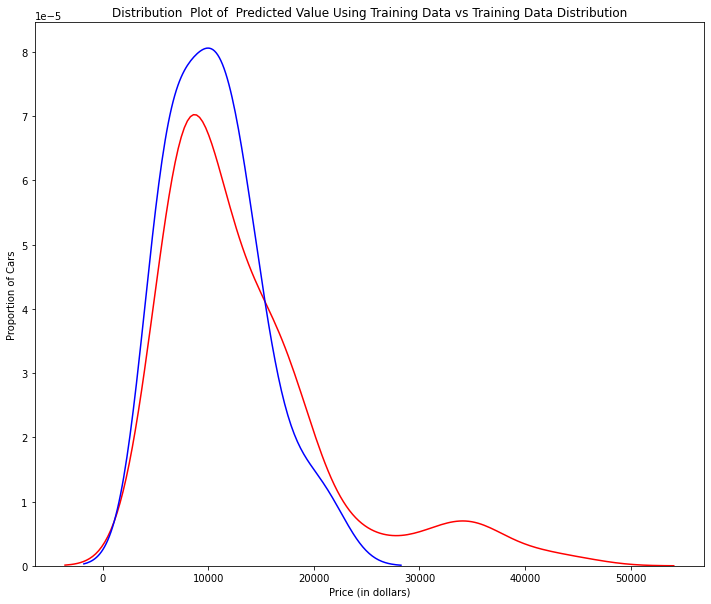

In [ ]:
from seaborn.distributions import distplot


#(1) Describimos el string Title.
Title = "Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution"

#(2) We remember this description.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1 , random_state=1)

#(3) We plot our results. 
###  This result we will call Figure (1)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train, y_1, "Actual Values (Train)", "Predicted Values (Train)", Title)


***Figure 1:*** Plot of predicted values using the training data compared to the actual values of the training data.



$ \ $

## ***Question.***

So far, the model seems to be doing well in learning from the training dataset, but:

$ \ $

$$\fbox{What happens when the model encounters new data from the testing dataset?}$$

$ \ $

 When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


In [ ]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


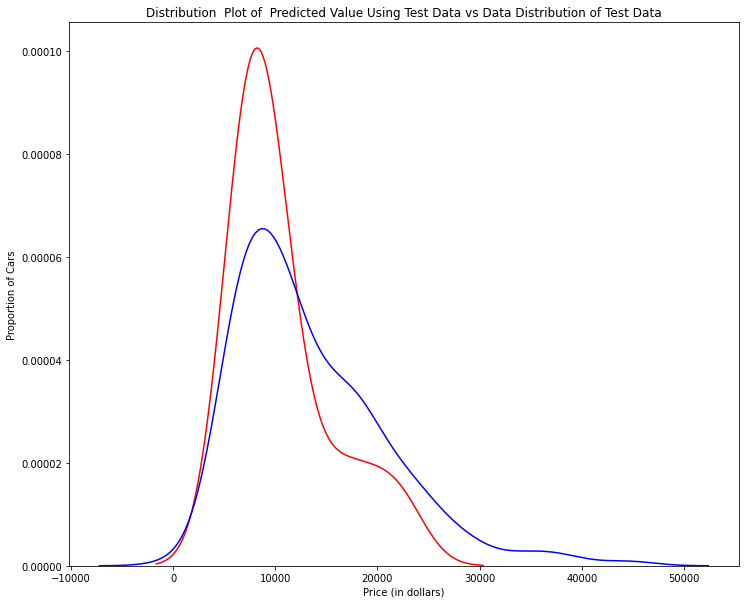

In [ ]:
#(1) We remember this description.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1 , random_state=1)

#(2) We remember some data.
lr = LinearRegression()
x = x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = y_train
lr.fit(x, y)

#(3) We give a predictive model.
y_1 = lr.predict(x)

#(4) We plot the distribution between y_test and y_1 using the function distribution_plot.
###  This result we will call Figure (2)
Title = "Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data"
distribution_plot(y_test, y_1, "Actual Values (Test)", "Predicted Values (Test)", Title)



***`Figure 2:`*** Plot of predicted value using the test data compared to the actual values of the test data.

$ \ $

-----

## ***Note (previous plots).***

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different.



$ \ $

----

# ***Example (previous plot).***

$(1)$ Let's use 55 percent of the data for training and the rest for testing:


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

$ \ $

$(2)$ Let's create a degree 5 polynomial model on the feature <b>'horsepower'</b>.



In [ ]:
#(1) We remember the following data.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

#(2) We construct the model pol_fea with features of polinomial of order 5.
pol_fea = PolynomialFeatures(degree=5)

#(3) We train the polinomial with some data.
x_train_pol = (pol_fea).fit_transform(x_train[['horsepower']])

#(4) We test the polinomial with some data.
x_test_pol = (pol_fea).fit_transform(x_test[['horsepower']])

#(5) We show on the screen our result.
pol_fea


PolynomialFeatures(degree=5)

$ \ $

$(3)$ Now, let's create a Linear Regression model "poly" and train it.


In [ ]:
#(1) We create the objectof type linear regression called poly.
poly = LinearRegression()

#(2) We fit x_train_pol, y_train in the object poly
poly.fit(x_train_pol, y_train)

LinearRegression()

$ \ $

$(4)$ We can see the output of our model using the method "predict." 


In [ ]:
# vemos nuestro resultado aproximado teniendo en cuenta la data de prueba x_test_pol
y_1 = poly.predict(x_test_pol)
y_1[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

$ \ $

$(5)$ Let's take the first five predicted values and compare it to the actual targets.


In [ ]:
print("Predicted values:", y_1[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


$ \ $

$(6)$ We will use the function "pol_plot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


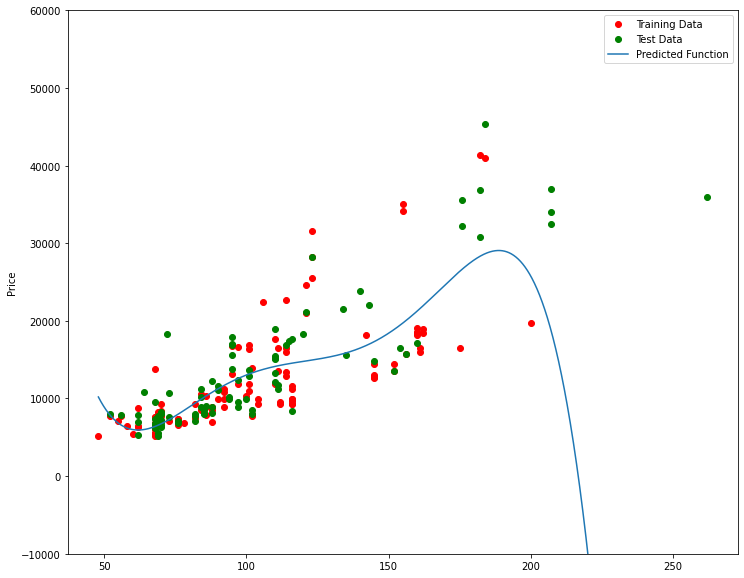

In [ ]:
#(1) We remember the following data.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

#(2) We create the objectof type linear regression called poly.
poly = LinearRegression()

#(3) We construct the model pol_fea with features of polinomial of order 5.
pol_fea = PolynomialFeatures(degree=5)

#(4) We fit x_train_pol, y_train in the object poly
poly.fit(x_train_pol, y_train)

#(5) We train the polinomial with some data.
x_train_pol = (pol_fea).fit_transform(x_train[['horsepower']])

#(6) We test the polinomial with some data.
x_test_pol = (pol_fea).fit_transform(x_test[['horsepower']])

#(7) We use the function pol_plot.
pol_plot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pol_fea)


***`Figure 3:`*** A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


$ \ $

---

### ***Note (previous plot).***

We see that the estimated function appears to track (parece rastrear) the data but around 200 horsepower, the function begins to diverge from the data points.


$ \ $

----

## ***Example (R^2 of two sets of data).***

$(1)$ Calcule the R^2 of the training data.


In [ ]:
poly.score(x_train_pol, y_train)

0.556771690212023

In [ ]:
#(1) We remember the following data.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

#(2) We create the objectof type linear regression called poly.
poly = LinearRegression()

#(3) We construct the model pol_fea with features of polinomial of order 5.
pol_fea = PolynomialFeatures(degree=5)

#(4) We fit x_train_pol, y_train in the object poly
poly.fit(x_train_pol, y_train)

#(5) We train the polinomial with some data.
x_train_pol = (pol_fea).fit_transform(x_train[['horsepower']])

#(6) R^2 of the training data using polinomials
poly.score(x_train_pol, y_train)

0.556771690212023

$ \ $


$(2)$ Calculate the R^2 of the test data:


In [ ]:
poly.score(x_test_pol, y_test)

-29.87134030204415

In [ ]:
#(1) We remember the following data.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

#(2) We create the objectof type linear regression called poly.
poly = LinearRegression()

#(3) We construct the model pol_fea with features of polinomial of order 5.
pol_fea = PolynomialFeatures(degree=5)

#(4) We fit x_train_pol, y_train in the object poly
poly.fit(x_train_pol, y_train)

#(5) We train the polinomial with some data.
x_test_pol = (pol_fea).fit_transform(x_test[['horsepower']])

#(6) R^2 of the test data using polinomials
poly.score(x_test_pol, y_test)

-29.87134030204415

$ \ $

---

### ***Note (previous result).***

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87 and we know that:

$$\text{The lower the R^2, the worse the model.}$$ 

A negative R^2 is a sign of overfitting (sobre ajuste).


$ \ $

----

## ***Example (R^2 of two sets of data).***

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results.


Text(3, 0.75, 'Maximum R^2 ')

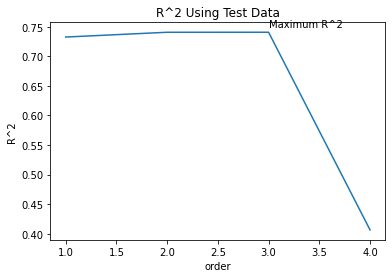

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

$ \ $

## ***Note (previous plot).***

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    pol_plot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.


In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

$ \ $

-----

# ***Question  (4 - a).***

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
pr1=PolynomialFeatures(degree=2)

```

</details>


$ \ $

-----

# ***Question  (4 - b).***
<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


```

</details>


<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


$ \ $

-----

# ***Question  (4 -c).***


How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
x_train_pr1.shape #there are now 15 features


```

</details>


$ \ $

-----

# ***Question  (4 - d).***
<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
poly1=LinearRegression().fit(x_train_pr1,y_train)


```

</details>


$ \ $

-----

# ***Question  (4 - e).***


<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

```

</details>


$ \ $

-----

# ***Question  (4 - f).***

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
#The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

```

</details>


$ \ $

# ***Part 3: Ridge Regression.***


In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


Let's perform a degree two polynomial transformation on our data.


In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [ ]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [ ]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [ ]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

Similarly, you can obtain a prediction:


In [ ]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:


In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 169.32it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas:


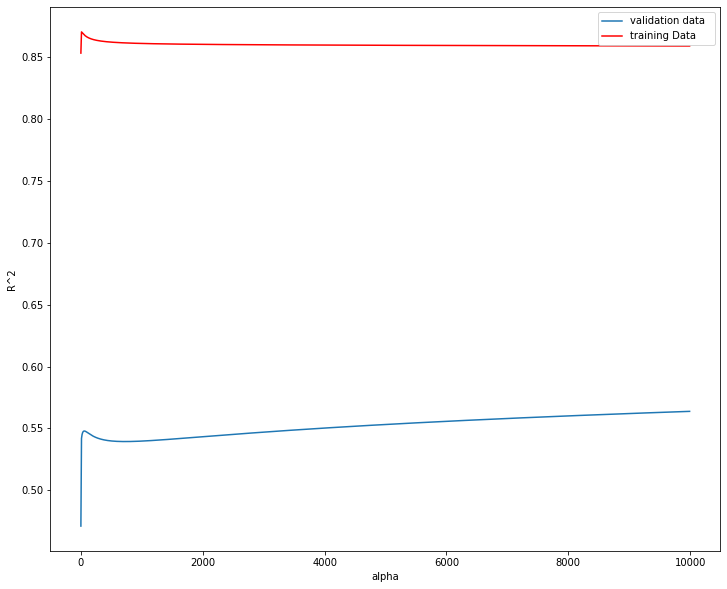

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


$ \ $

-----

# ***Question  (5).***

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

```

</details>


$ \ $

# ***Part 4: Grid Search.***


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [ ]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [ ]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [ ]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".

Fit the model:


In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [ ]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

We now test our model on the test data:


In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

$ \ $

-----

# ***Question  (6).***


Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:



In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_


```

</details>


$ \ $

----

### ***Thank you for completing this lab!***

## ***Author***

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2020-10-30        | 2.3     | Lakshmi    | Changed URL of csv                  |
| 2020-10-05        | 2.2     | Lakshmi    | Removed unused library imports      |
| 2020-09-14        | 2.1     | Lakshmi    | Made changes in OverFitting section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
